As mentioned we would use the chimefrbcat.csv to make a mock data of similar value to test our code and plots. 

In [74]:
using Interpolations,CSV,DataFrames,Plots,Statistics

Making a distribution fuction for z and $ \alpha $ as mentioned in future prospects of paper :
$$ n(z) = z^2 * e^{-\alpha z} *\alpha ^{\frac 3 2}$$

In [82]:
function gl_distribution(z, α = 7)
    return (α^3 / 2) * z^2 * exp(-α * z)
end

gl_distribution (generic function with 2 methods)

Integrating this distribution fuction gives
$$ \int_0 ^z z^2 \alpha ^{\frac 3 2} \cdot e^{-\alpha z} dz = 1 -\frac{\left({\alpha}z\left({\alpha}z+2\right)+2\right)\mathrm{e}^{-{\alpha}z}}{2} $$

In [83]:
# Taking integration of above distribution function to get Cumulative distribution function with limits 0 to variable z only gives above function
# interpolation of data using Cumulative probability distribution function(cpdf)
function cpdf_gb(z ; α = 7)
    return 1-exp(-α*z)*((α*z)^2+2*α*z+2)/2
end

cpdf_gb (generic function with 1 method)

In [84]:
z = collect(0:0.01:3)
galaxy = gl_distribution.(z)
cpdf = cpdf_gb.(z)

301-element Vector{Float64}:
 0.0
 5.424784186591758e-5
 0.0004119009384531136
 0.001319679752430969
 0.002970088271607052
 0.005508933384465564
 0.009041986354931475
 0.01364087404338088
 0.019348279184354555
 0.026182521448938734
 ⋮
 0.9999996942375716
 0.9999997130484084
 0.9999997307076491
 0.9999997472854095
 0.9999997628475621
 0.9999997774559919
 0.9999997911688355
 0.999999804040707
 0.9999998161229097

In [70]:
data = CSV.read("chimefrbcat.csv", DataFrame)

Row,name,RA,e_RA,DEC,e_DEC,gl,gb,DM_obs,e_DM_obs,DM_MW_NE2001,DM_MW_YMW16,redshift
,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,FRB20180725A,93.42,0.039,67.07,0.21,147.29,21.29,715.809,0.0041,644.2,635.4,1.18683
2,FRB20180727A,197.72,0.13,26.42,0.26,24.76,85.6,642.134,0.015,620.9,622.4,1.02695
3,FRB20180729A,199.4,0.12,55.58,0.084,115.26,61.16,109.594,0.00031,78.8,86.8,0.273329
4,FRB20180729B,89.93,0.27,56.5,0.24,156.9,15.68,317.224,0.0045,223.2,198.8,0.474243
5,FRB20180730A,57.39,0.032,87.19,0.2,125.11,25.11,848.904,0.0018,789.7,790.5,0.288537
6,FRB20180801A,322.53,0.059,72.72,0.22,109.21,15.46,655.728,0.016,565.6,547.7,0.461489
7,FRB20180806A,228.56,0.071,75.62,0.39,112.27,38.4,739.948,0.008,699.3,706.0,0.275724
8,FRB20180810A,101.47,0.13,34.86,0.24,180.67,14.06,414.88,0.004,310.2,274.7,0.430718
9,FRB20180810B,180.41,0.016,83.14,0.16,124.71,33.82,169.138,0.0017,123.3,129.6,0.706363


In [78]:
N = length(data[:, 1])
rs_mock = zeros(N)
for i in 1:N
    interp_linear = LinearInterpolation(cpdf, z)
    rs_mock[i] = interp_linear(rand())
end

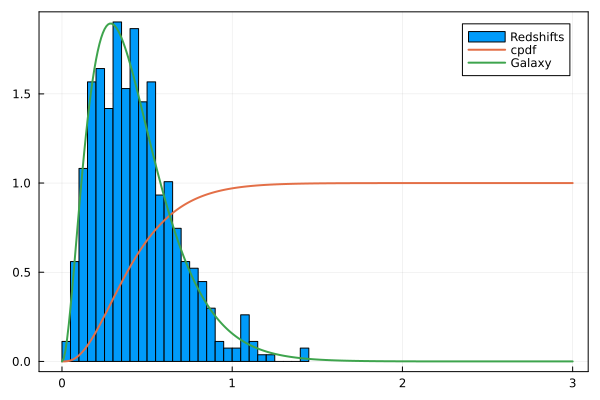

In [86]:
# Writing mock data to new CSV file
data.redshift = rs_mock
CSV.write("mock.csv",data)
mock_data = CSV.read("mock.csv", DataFrame)
plot(framestyle=:box)
histogram!(mock_data.redshift, label = "Redshifts", normed = true, bins = 50)
plot!(z, cpdf, label = "cpdf",lw=2, normed = true)
plot!(z, galaxy, label = "Galaxy",lw=2, normed = true)